# Visualize all senescence scores


In [2]:
# basic imports
import os
import sys
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt


## Create one adata with all senescence scores appended
#### Can downsample cells in prol to match tam for visualization and statistics calculations

In [3]:
adata = sc.read_h5ad('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_with_DS_SID.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 17126 × 17052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment', 'ds', 'binary', 'SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID5_Score', 'SID6_Score', 'SID1_binary', 'SID2_binary', 'SID3_binary', 'SID4_binary', 'SID5_binary', 'SID6_binary'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [105]:
adata.var_names

Index(['Xkr4', 'Rp1', 'Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h',
       'Oprk1', 'Npbwr1',
       ...
       'Uba1y', 'Kdm5d', 'Eif2s3y', 'Uty', 'Ddx3y', 'Usp9y', 'Zfy2', 'Rbmy',
       'Gm3376', 'Gm20736'],
      dtype='object', length=17052)

#### Add deepscence scores to adata

In [106]:
# read obs of adata_scored
obs_scored = pd.read_csv('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_DeepScence_scores.txt', sep = '\t')
display(obs_scored)


Unnamed: 0        ds  binary
0      020624_Prol_AAACCCAAGATGAAGG-1 -0.648627       0
1      020624_Prol_AAACCCAAGATTAGTG-1 -1.611665       0
2      020624_Prol_AAACCCAAGGTCATCT-1 -1.145400       0
3      020624_Prol_AAACCCACAAACCATC-1  0.188017       1
4      020624_Prol_AAACCCACAGACCAAG-1 -0.761007       0
...                               ...       ...     ...
17121   020624_Tam_TTTGGTTCAGAAGCTG-1 -0.114799       1
17122   020624_Tam_TTTGGTTCATACCAGT-1 -0.836613       0
17123   020624_Tam_TTTGGTTGTGACCTGC-1  0.156487       1
17124   020624_Tam_TTTGTTGTCCGAAGGA-1  0.057534       1
17125   020624_Tam_TTTGTTGTCTGTCTCG-1  0.159368       1

[17126 rows x 3 columns]

In [107]:
# add the ds and binary columns to adata.obs
obs_scored = obs_scored.set_index('Unnamed: 0')  # this is the column with cell names
adata.obs['ds'] = obs_scored['ds']
adata.obs['binary'] = obs_scored['binary']


#### Add SID scores to adata.obs

In [108]:
# load SID pkl object using joblib
import joblib
pred_dict = joblib.load('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_SenCID_pred_dict.pkl')
pred_dict

{'SID1':                                 SID_Score  Decision  Binarization
 020624_Prol_AAACCCAAGATGAAGG-1   0.132403 -0.529981           0.0
 020624_Prol_AAACCCAAGATTAGTG-1   0.043374 -0.998756           0.0
 020624_Prol_AAACCCAAGGTCATCT-1   0.154095 -0.503229           0.0
 020624_Prol_AAACCCACAAACCATC-1   0.253527 -0.263015           0.0
 020624_Prol_AAACCCACAGACCAAG-1   0.063664 -0.889003           0.0
 ...                                   ...       ...           ...
 020624_Tam_TTTGGTTCAGAAGCTG-1    0.213338 -0.406173           0.0
 020624_Tam_TTTGGTTCATACCAGT-1    0.041675 -1.062946           0.0
 020624_Tam_TTTGGTTGTGACCTGC-1    0.575561  0.230774           1.0
 020624_Tam_TTTGTTGTCCGAAGGA-1    0.314806 -0.216850           0.0
 020624_Tam_TTTGTTGTCTGTCTCG-1    0.194982 -0.491982           0.0
 
 [17126 rows x 3 columns],
 'SID2':                                 SID_Score  Decision  Binarization
 020624_Prol_AAACCCAAGATGAAGG-1   0.004497 -2.940914           0.0
 020624_Prol_AAAC

In [109]:
# Add scores to adata.obs
adata.obs['SID1_Score'] = pred_dict['SID1'].loc[adata.obs_names, 'SID_Score']
adata.obs['SID2_Score'] = pred_dict['SID2'].loc[adata.obs_names, 'SID_Score']
adata.obs['SID3_Score'] = pred_dict['SID3'].loc[adata.obs_names, 'SID_Score']
adata.obs['SID4_Score'] = pred_dict['SID4'].loc[adata.obs_names, 'SID_Score']
adata.obs['SID5_Score'] = pred_dict['SID5'].loc[adata.obs_names, 'SID_Score']
adata.obs['SID6_Score'] = pred_dict['SID6'].loc[adata.obs_names, 'SID_Score']


In [110]:
# add senescence binary to adata.obs per SID score
adata.obs['SID1_binary'] = pred_dict['SID1'].loc[adata.obs_names, 'Binarization']
adata.obs['SID2_binary'] = pred_dict['SID2'].loc[adata.obs_names, 'Binarization']
adata.obs['SID3_binary'] = pred_dict['SID3'].loc[adata.obs_names, 'Binarization']
adata.obs['SID4_binary'] = pred_dict['SID4'].loc[adata.obs_names, 'Binarization']
adata.obs['SID5_binary'] = pred_dict['SID5'].loc[adata.obs_names, 'Binarization']
adata.obs['SID6_binary'] = pred_dict['SID6'].loc[adata.obs_names, 'Binarization']


In [112]:
#save adata
adata.write_h5ad('/ix/djishnu/Akanksha/datasets/senescence_fibroblasts/mouse_fibro/MEFs_processed_with_SID.h5ad')

#### Split adata into tamoxifen treated and proliferating control

In [73]:
adata_tamxoifen = adata[adata.obs['Treatment'] == 'Tam']
adata_control = adata[adata.obs['Treatment'] == 'Prol']


In [ ]:
adata_tamxoifen

In [ ]:
adata_control

In [ ]:
sc.pl.umap(adata, color = ['Treatment','integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis')

In [ ]:

sc.pl.umap(adata_tamxoifen, color = ['integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis', title = 'Tamoxifen treated')
sc.pl.umap(adata_control, color = ['integrated_snn_res.0.4','ds', 'binary'], color_map = 'viridis', title = 'Proliferating control')


#### Violin plot of deepscence scores per cell cluster

In [ ]:
# violin plot of ds scores per cell cluster calculated seperately for treated and control cells
sc.pl.violin(adata, keys = ['ds'], groupby = 'Treatment', rotation = 90)


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.multitest import multipletests

def add_stat_annotation(x1, x2, y, h, p_adj):
    """Add significance annotation to plot"""
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    if p_adj < 0.001:
        stars = '***'
    elif p_adj < 0.01:
        stars = '**'
    elif p_adj < 0.05:
        stars = '*'
    else:
        stars = 'ns'
    plt.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom')

In [ ]:
# Get data for tamoxifen and proliferating cells
tam_data = adata_tamxoifen.obs[['ds', 'integrated_snn_res.0.4']].assign(Treatment='Tam')
prol_data = adata_control.obs[['ds', 'integrated_snn_res.0.4']].assign(Treatment='Prol')

# Combine the data
plot_data = pd.concat([tam_data, prol_data])

In [ ]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=0.85)

# Create violin plot
sns.violinplot(data=plot_data, 
              x='integrated_snn_res.0.4',  
              y='ds',                   
              hue='Treatment',             
              split=True,
              inner='quartile')

# Prepare for statistical testing
clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
max_y = plot_data['ds'].max()
min_y = plot_data['ds'].min()
y_range = max_y - min_y
spacing = y_range * 0.1

# Collect all p-values first
p_values = []
cluster_pairs = []

for cluster in clusters:
    cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster]['ds']
    cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster]['ds']
    
    # Perform t-test
    stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
    p_values.append(p_val)
    cluster_pairs.append((cluster_tam, cluster_prol))

# Correct for multiple testing using Benjamini-Hochberg method
rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')

# Add annotations with adjusted p-values
for idx, (p_adj, cluster) in enumerate(zip(p_adjusted, clusters)):
    y_pos = max_y + spacing * (1.2)
    add_stat_annotation(idx-0.2, idx+0.2, y_pos, spacing*0.5, p_adj)

# Customize the plot
plt.title('DeepScence Scores by Cluster\n(FDR-corrected p-values)', pad=50)
plt.xlabel('Cluster')
plt.ylabel('DeepScence Score')
plt.xticks(rotation=0)

# Adjust y-axis limits
plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))

# Add legend
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=0.85)

# Create violin plot - note removed split=True and adjusted x parameter
sns.violinplot(data=plot_data, 
              x='integrated_snn_res.0.4',  
              y='ds',                   
              hue='Treatment',             
              inner='quartile')

# Prepare for statistical testing
clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
max_y = plot_data['ds'].max()
min_y = plot_data['ds'].min()
y_range = max_y - min_y
spacing = y_range * 0.1

# Collect all p-values first
p_values = []
cluster_pairs = []

for idx, cluster in enumerate(clusters):
    cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster]['ds']
    cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster]['ds']
    
    # Perform t-test
    stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
    p_values.append(p_val)
    cluster_pairs.append((cluster_tam, cluster_prol))
    
    # Adjust x-coordinates for side-by-side violins
    x1 = idx - 0.2  # Position of first violin in pair
    x2 = idx + 0.2  # Position of second violin in pair
    
    # Add statistical annotation
    y_pos = max_y + spacing * (1.2)
    add_stat_annotation(x1, x2, y_pos, spacing*0.5, p_val)

# Correct for multiple testing using Benjamini-Hochberg method
rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')

# Customize the plot
plt.title('DeepScence Scores by Cluster\n(FDR-corrected p-values)', pad=50)
plt.xlabel('Cluster')
plt.ylabel('DeepScence Score')
plt.xticks(rotation=0)

# Adjust y-axis limits
plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))

# Add legend
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage of senescent cells per cluster for tamoxifen treated cells
cluster_percentages_tam = (adata_tamxoifen.obs
    .groupby('integrated_snn_res.0.4')
    .agg({
        'binary': ['count', 'sum']
    })
)
cluster_percentages_tam['percent_senescent'] = (cluster_percentages_tam['binary']['sum'] / 
                                              cluster_percentages_tam['binary']['count'] * 100)

# Calculate percentage of senescent cells per cluster for proliferating control cells
cluster_percentages_prol = (adata_control.obs
    .groupby('integrated_snn_res.0.4')
    .agg({
        'binary': ['count', 'sum']
    })
)
cluster_percentages_prol['percent_senescent'] = (cluster_percentages_prol['binary']['sum'] / 
                                               cluster_percentages_prol['binary']['count'] * 100)

# Display results
print("Tamoxifen treated cells - % senescent cells per cluster:")
print(cluster_percentages_tam['percent_senescent'].round(2))
print("\nProliferating control cells - % senescent cells per cluster:")
print(cluster_percentages_prol['percent_senescent'].round(2))


### Viz sen pathways from Aucell 

In [ ]:
sc.pl.umap(
    adata,
    color=["Treatment", "integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
)

In [ ]:
sc.pl.umap(
    adata_tamxoifen,
    color=["integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
    title="Tamoxifen treated"
)
sc.pl.umap(
    adata_control,
    color=["integrated_snn_res.0.4"] + sen_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
    title="Proliferating control"
)

#### Heatmaps of geneset scores/methods to get senescence transcriptomic signatures

In [ ]:
# group adata obs by cell cluster (integrated_snn_res.0.4) and get mean value of scores of sen_pathways
sen_tam_scores_mean = adata_tamxoifen.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()
sen_prol_scores_mean = adata_control.obs.groupby("integrated_snn_res.0.4")[sen_pathways].mean()
display(sen_tam_scores_mean)
display(sen_prol_scores_mean)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for tamoxifen treated cells
plt.figure(figsize=(10, 10))
sns.heatmap(sen_tam_scores_mean.T,
            cmap='YlOrRd',  # Changed to YlOrRd colormap
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Set minimum value for consistent scale
            vmax=0.2)  # Set maximum value for consistent scale
plt.title('Senescence Scores - Tamoxifen Treated')
plt.xlabel('Cell Clusters')
plt.ylabel('Senescence Pathways')
plt.show()

# Plot heatmap for proliferating control cells
plt.figure(figsize=(10, 10))
sns.heatmap(sen_prol_scores_mean.T,
            cmap='YlOrRd',  # Changed to YlOrRd colormap
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Set minimum value for consistent scale
            vmax=0.2)  # Set maximum value for consistent scale
plt.title('Senescence Scores - Proliferating Control')
plt.xlabel('Cell Clusters')
plt.ylabel('Senescence Pathways')
plt.show()

#### Violin plots to compare senescence scores between treated and control for geneset scores

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.multitest import multipletests

def add_stat_annotation(x1, x2, y, h, p_adj):
    """Add significance annotation to plot"""
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    if p_adj < 0.001:
        stars = '***'
    elif p_adj < 0.01:
        stars = '**'
    elif p_adj < 0.05:
        stars = '*'
    else:
        stars = 'ns'
    plt.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom')

# Plot each pathway separately
for pathway in sen_pathways:
    # Get data for tamoxifen and proliferating cells
    tam_data = adata_tamxoifen.obs[[pathway, 'integrated_snn_res.0.4']].assign(Treatment='Tam')
    prol_data = adata_control.obs[[pathway, 'integrated_snn_res.0.4']].assign(Treatment='Prol')
    
    # Combine the data
    plot_data = pd.concat([tam_data, prol_data])
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    plt.subplots_adjust(top=0.85)
    
    # Create violin plot
    sns.violinplot(data=plot_data, 
                  x='integrated_snn_res.0.4',  
                  y=pathway,                   
                  hue='Treatment',             
                  split=True,
                  inner='quartile')
    
    # Prepare for statistical testing
    clusters = sorted(plot_data['integrated_snn_res.0.4'].unique())
    max_y = plot_data[pathway].max()
    min_y = plot_data[pathway].min()
    y_range = max_y - min_y
    spacing = y_range * 0.1
    
    # Collect all p-values first
    p_values = []
    cluster_pairs = []
    
    for cluster in clusters:
        cluster_tam = tam_data[tam_data['integrated_snn_res.0.4'] == cluster][pathway]
        cluster_prol = prol_data[prol_data['integrated_snn_res.0.4'] == cluster][pathway]
        
        # Perform t-test
        stat, p_val = stats.ttest_ind(cluster_tam, cluster_prol)
        p_values.append(p_val)
        cluster_pairs.append((cluster_tam, cluster_prol))
    
    # Correct for multiple testing using Benjamini-Hochberg method
    rejected, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')
    
    # Add annotations with adjusted p-values
    for idx, (p_adj, cluster) in enumerate(zip(p_adjusted, clusters)):
        y_pos = max_y + spacing * (1.2)
        add_stat_annotation(idx-0.2, idx+0.2, y_pos, spacing*0.5, p_adj)
    
    # Customize the plot
    plt.title(f'{pathway} Scores by Cluster\n(FDR-corrected p-values)', pad=50)
    plt.xlabel('Cluster')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    
    # Adjust y-axis limits
    plt.ylim(min_y - (y_range * 0.1), max_y + (spacing * 3))
    
    # Add legend
    plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

## Viz SID scores

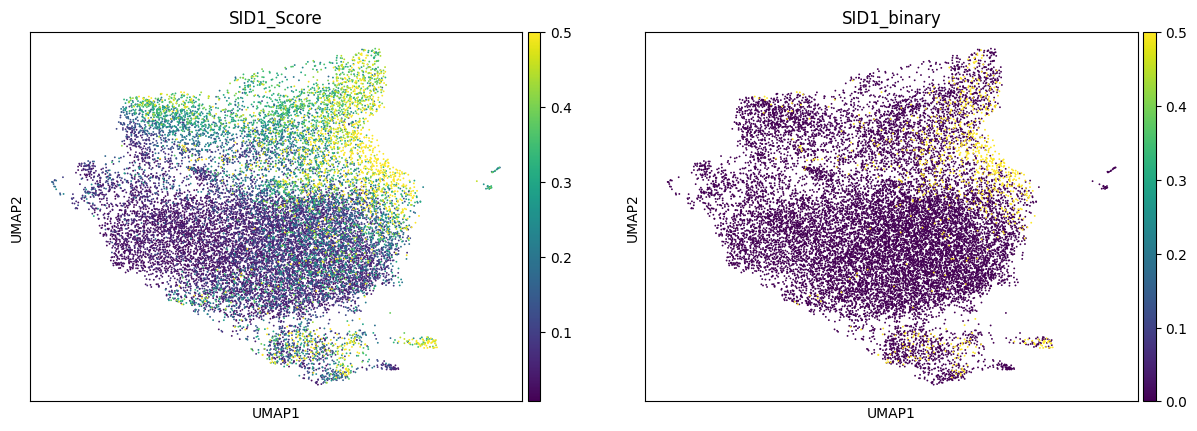

In [74]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID1_Score', 'SID1_binary'], color_map = 'viridis', vmax = 0.5)

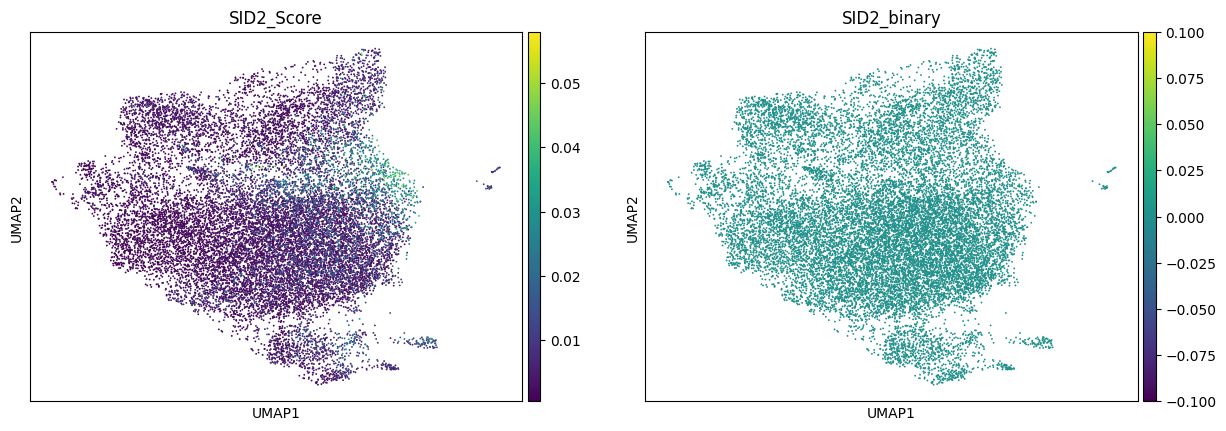

In [26]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID2_Score', 'SID2_binary'], color_map = 'viridis')

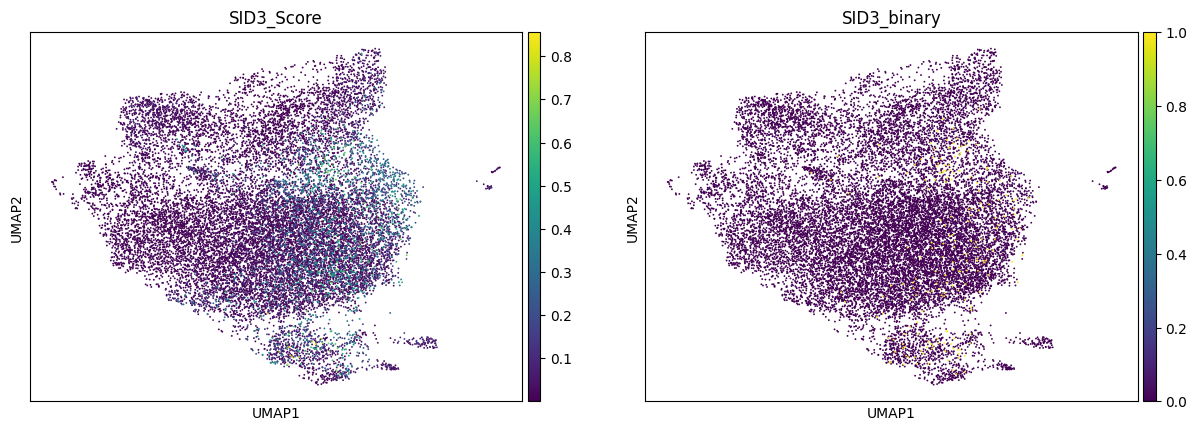

In [27]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID3_Score', 'SID3_binary'], color_map = 'viridis')

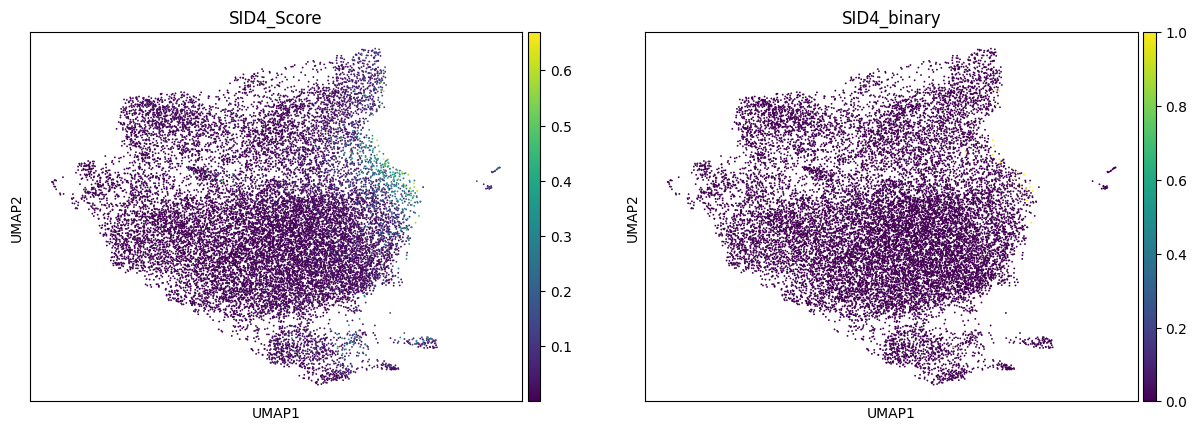

In [28]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID4_Score', 'SID4_binary'], color_map = 'viridis')

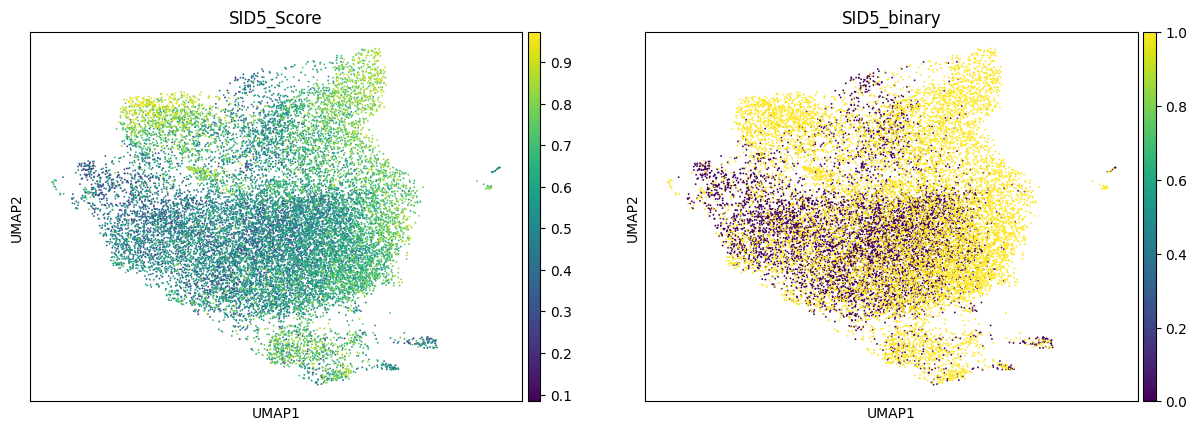

In [29]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID5_Score', 'SID5_binary'], color_map = 'viridis')

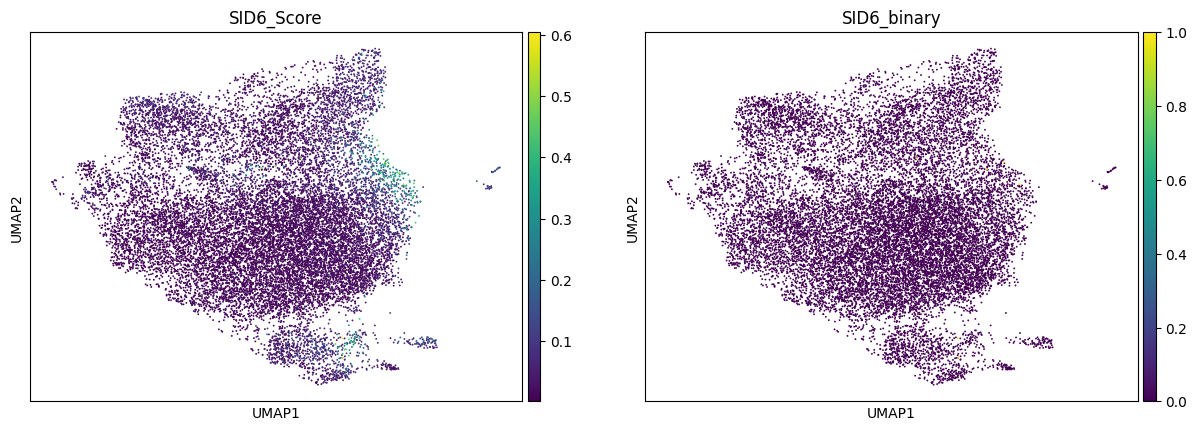

In [30]:
# color bar should have min and max of the score values 
sc.pl.umap(adata, color = ['SID6_Score', 'SID6_binary'], color_map = 'viridis')

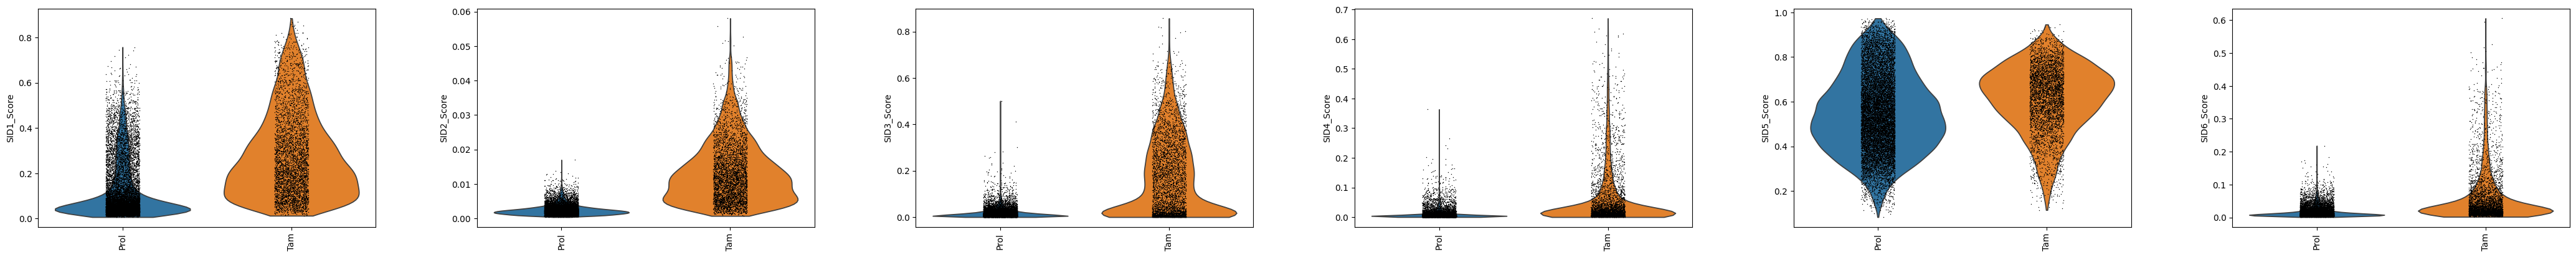

In [23]:
# split violin plot of SID scores by treatment
sc.pl.violin(adata, keys = ['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID5_Score', 'SID6_Score'], groupby = 'Treatment', rotation = 90)


In [75]:
# get the mean score per cluster for all SIDs and then stack a heatmap (remove SID5 as it is also high in Prol as seen in violin plot)
sid_scores_mean_all_cells = adata.obs.groupby("integrated_snn_res.0.4")[['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID6_Score']].mean()
sid_scores_mean_tam = adata_tamxoifen.obs.groupby("integrated_snn_res.0.4")[['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID6_Score']].mean()
sid_scores_mean_prol = adata_control.obs.groupby("integrated_snn_res.0.4")[['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID6_Score']].mean()


/tmp/ipykernel_64914/2271154674.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sid_scores_mean_all_cells = adata.obs.groupby("integrated_snn_res.0.4")[['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID6_Score']].mean()
/tmp/ipykernel_64914/2271154674.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sid_scores_mean_tam = adata_tamxoifen.obs.groupby("integrated_snn_res.0.4")[['SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID6_Score']].mean()
/tmp/ipykernel_64914/2271154674.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versi

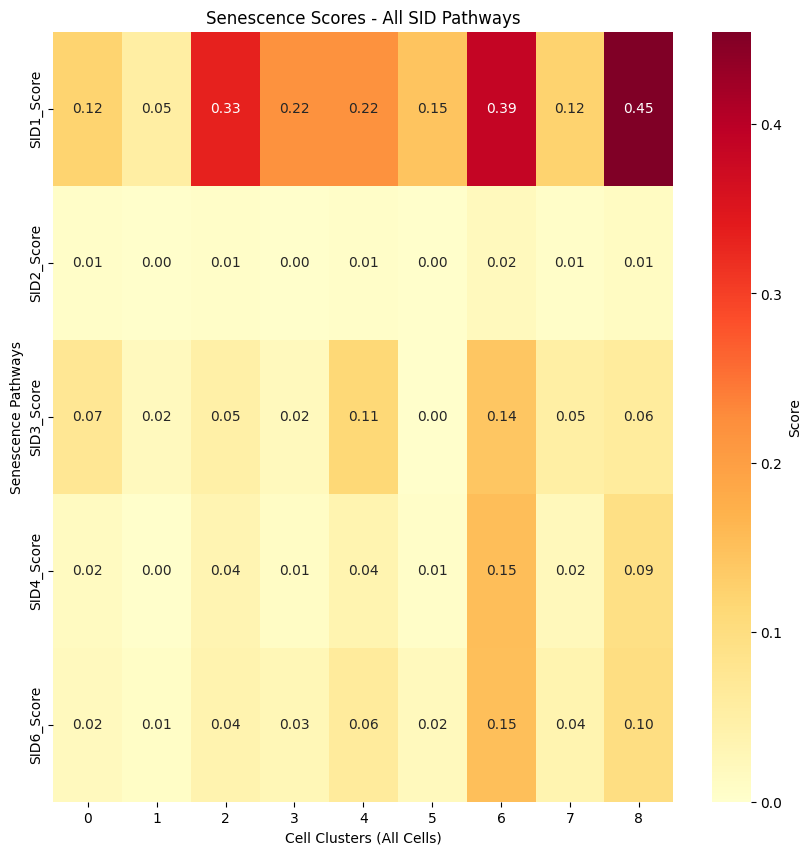

In [76]:
# Plot heatmap with dynamic vmax based on data
plt.figure(figsize=(10, 10))
sns.heatmap(sid_scores_mean_all_cells.T,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Keep 0 as minimum
            vmax=None)  # Let vmax be determined by the data's maximum value

plt.title('Senescence Scores - All SID Pathways')
plt.xlabel('Cell Clusters (All Cells)')
plt.ylabel('Senescence Pathways')
plt.show()

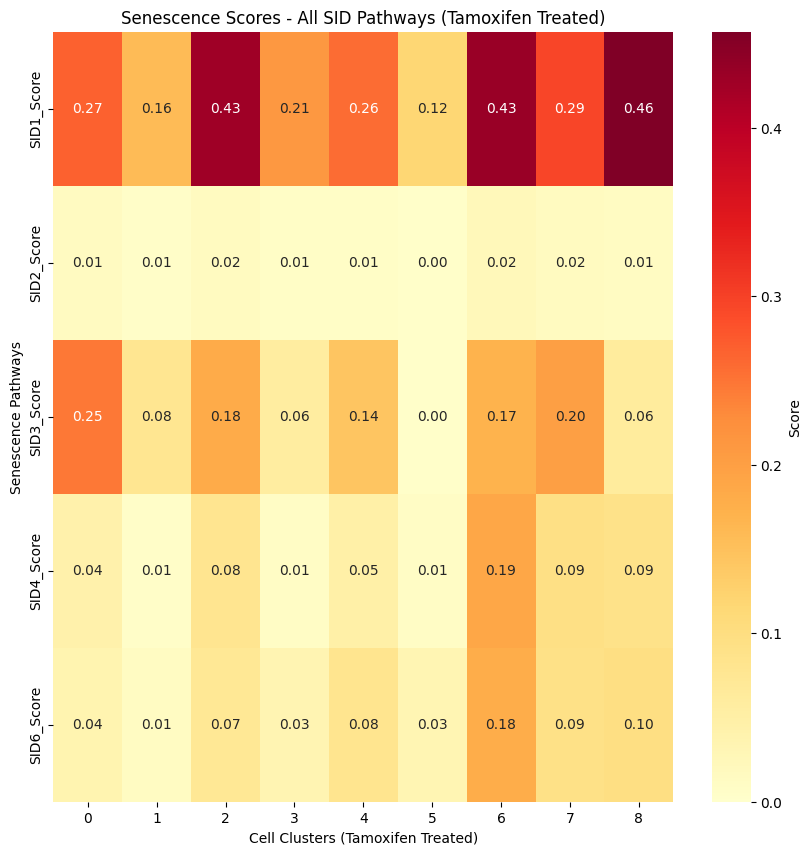

In [42]:
# Plot heatmap with dynamic vmax based on data
plt.figure(figsize=(10, 10))
sns.heatmap(sid_scores_mean_tam.T,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Keep 0 as minimum
            vmax=None)  # Let vmax be determined by the data's maximum value

plt.title('Senescence Scores - All SID Pathways (Tamoxifen Treated)')
plt.xlabel('Cell Clusters (Tamoxifen Treated)')
plt.ylabel('Senescence Pathways')
plt.show()

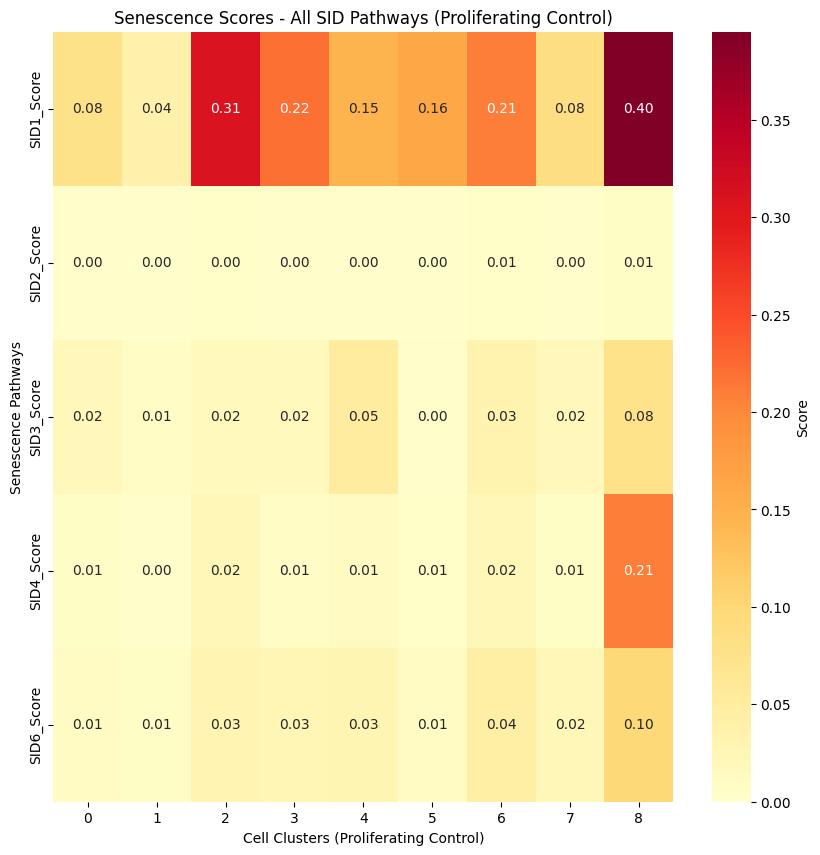

In [43]:
# Plot heatmap with dynamic vmax based on data
plt.figure(figsize=(10, 10))
sns.heatmap(sid_scores_mean_prol.T,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Score'},
            xticklabels=True,
            yticklabels=True,
            vmin=0,  # Keep 0 as minimum
            vmax=None)  # Let vmax be determined by the data's maximum value

plt.title('Senescence Scores - All SID Pathways (Proliferating Control)')
plt.xlabel('Cell Clusters (Proliferating Control)')
plt.ylabel('Senescence Pathways')
plt.show()

#### Barplot of senescent cells per cluster as predicted by SID3, SID1 and SID6

/tmp/ipykernel_64914/3094988113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sid3_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID3_binary'].sum()
/tmp/ipykernel_64914/3094988113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sid1_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID1_binary'].sum()
/tmp/ipykernel_64914/3094988113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

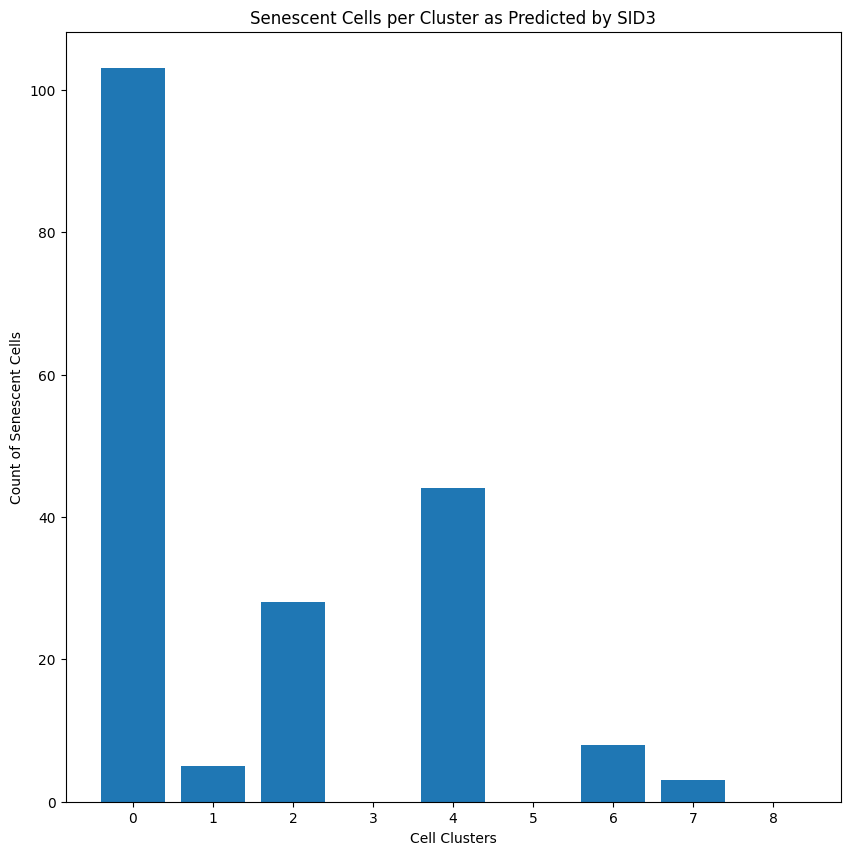

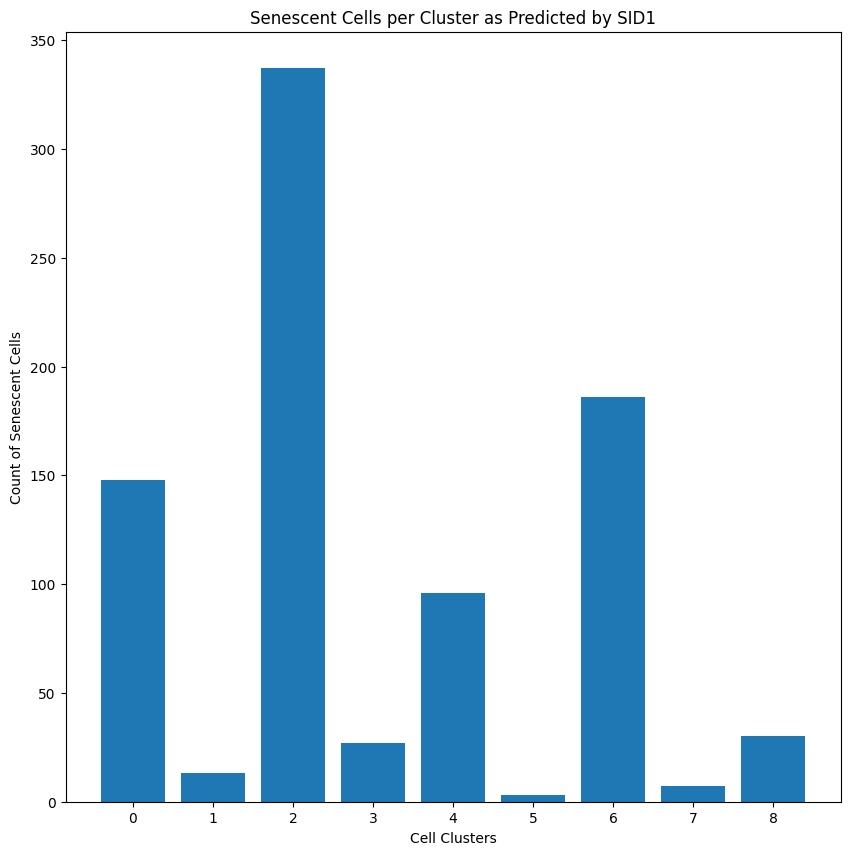

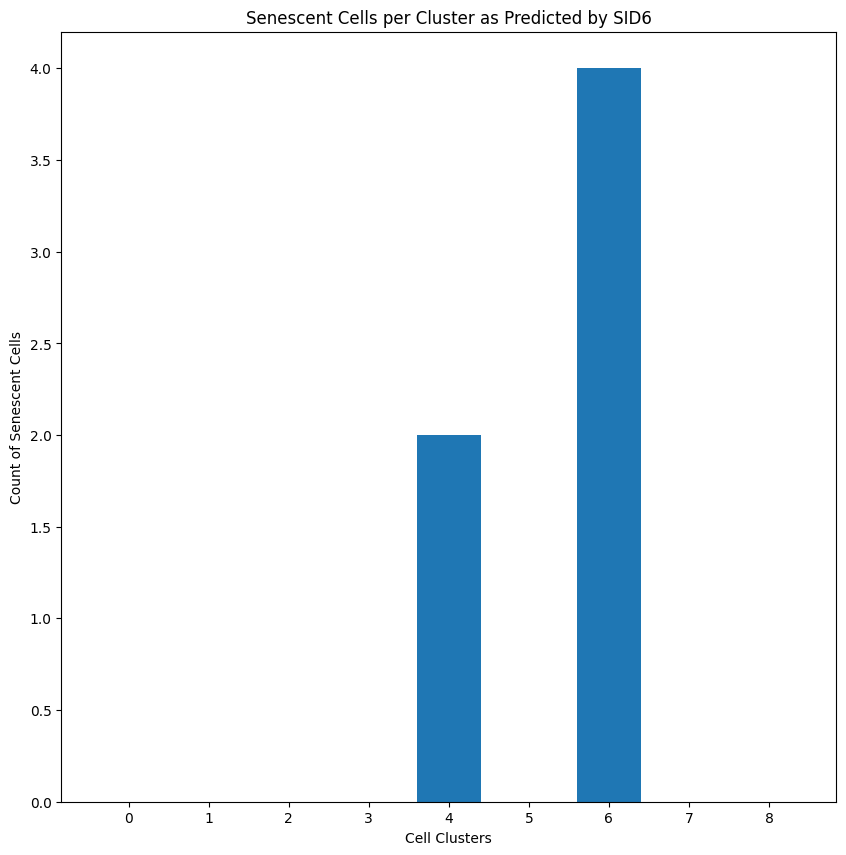

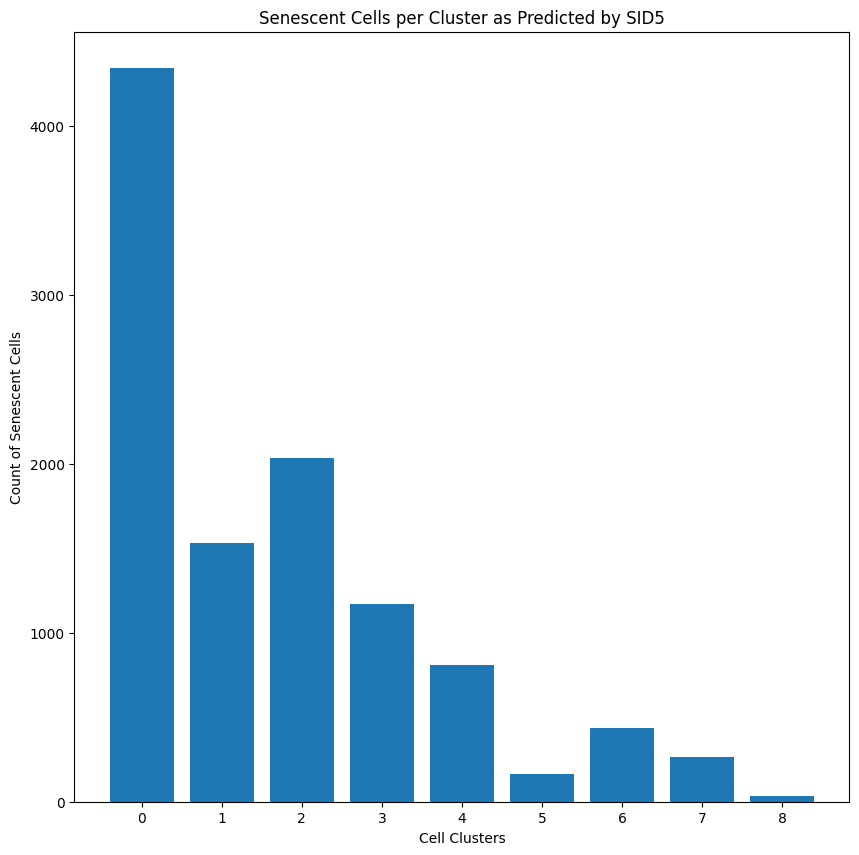

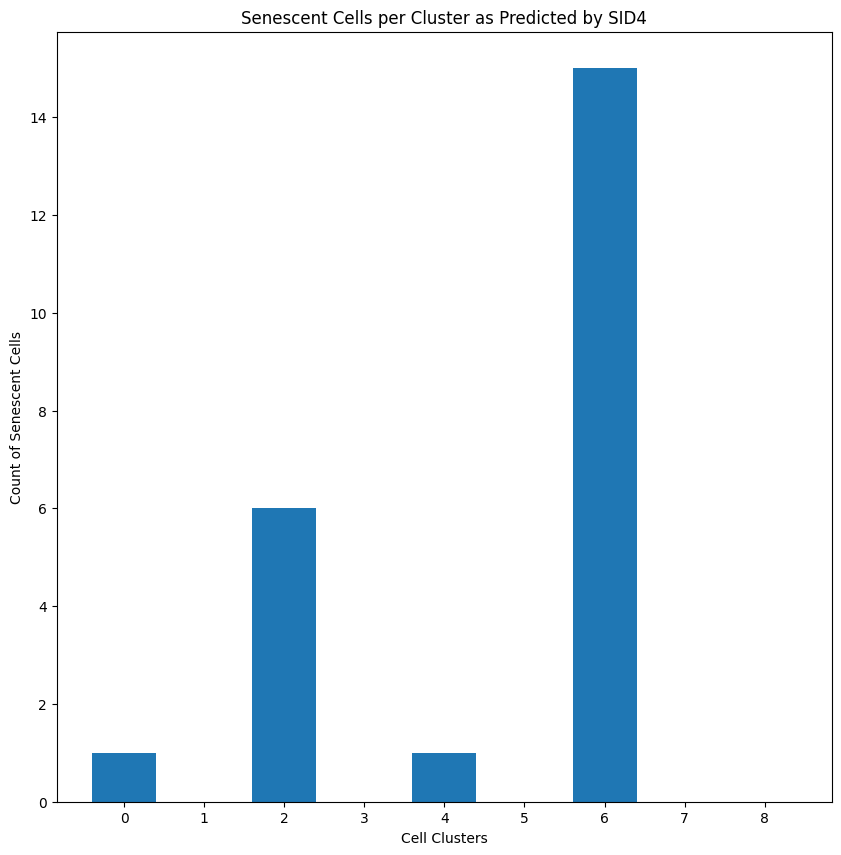

In [77]:
# get the Binarization counts (sum()) from adata.obs per cluster for SID3, SID1 and SID6
sid3_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID3_binary'].sum()
sid1_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID1_binary'].sum()
sid6_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID6_binary'].sum()
sid5_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID5_binary'].sum()
sid4_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID4_binary'].sum()
sid2_binary_counts = adata.obs.groupby("integrated_snn_res.0.4")['SID2_binary'].sum()

# plot a barplot of the counts with separate plots for each SID and stack in one figure
plt.figure(figsize=(10, 10))
plt.bar(sid3_binary_counts.index, sid3_binary_counts.values)
plt.title('Senescent Cells per Cluster as Predicted by SID3')
plt.xlabel('Cell Clusters')
plt.ylabel('Count of Senescent Cells')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(sid1_binary_counts.index, sid1_binary_counts.values)
plt.title('Senescent Cells per Cluster as Predicted by SID1')
plt.xlabel('Cell Clusters')
plt.ylabel('Count of Senescent Cells')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(sid6_binary_counts.index, sid6_binary_counts.values)
plt.title('Senescent Cells per Cluster as Predicted by SID6')
plt.xlabel('Cell Clusters')
plt.ylabel('Count of Senescent Cells')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(sid5_binary_counts.index, sid5_binary_counts.values)
plt.title('Senescent Cells per Cluster as Predicted by SID5')
plt.xlabel('Cell Clusters')
plt.ylabel('Count of Senescent Cells')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(sid4_binary_counts.index, sid4_binary_counts.values)
plt.title('Senescent Cells per Cluster as Predicted by SID4')
plt.xlabel('Cell Clusters')
plt.ylabel('Count of Senescent Cells')
plt.show()



#### Expression plots of SID6 gene list

In [78]:
SID6_genes = ['MYC', 'AURKB', 'CCND1', 'CDKN1A', 'CDKN2B', 'ID1', 'IGFBP3', 'IGFBP5', 'LMNA'
                , 'MKI67', 'MMP2', 'STAT1', 'TWIST1', 'PCNA', 'CCNE1', 'TBX2', 'PRKCD', 'ARHGAP18'
                , 'WNT5A', 'UBA52', 'TAGLN', 'SLC13A3', 'RRM2', 'RRM1', 'RPS27A', 'RPL5', 'PSMB5'
                , 'MAPK10', 'ERRFI1', 'PGD', 'MYBL2', 'SMAD6', 'SMAD3', 'SMAD1', 'JUN', 'CDC26'
                , 'ETS2', 'ENG', 'EEF1B2', 'DUSP4', 'E2F7', 'JDP2', 'CLU', 'CKB', 'UBE2C', 'CENPA'
                , 'ANAPC10', 'CD9', 'CSF1', 'CXCL12', 'FAS', 'IGFBP6', 'VEGFA', 'BHLHE40'
                , 'CDK2AP1', 'DDB2', 'DHCR24', 'LGALS3', 'NUAK1', 'PMVK', 'SIX1', 'YAP1', 'ZFP36'
                , 'ABCA3', 'ANGPT1', 'SLC25A5', 'ANXA4', 'CDC20', 'CENPE', 'CENPF', 'CKS2'
                , 'COL6A3', 'COL8A1', 'DAB2', 'DGKA', 'GADD45A', 'DNASE1L1', 'DPYSL3', 'EMP2'
                , 'EPAS1', 'EPHA4', 'CLN8', 'ERH', 'FBL', 'ETV4', 'FANCA', 'FHL1', 'IFI6', 'GAS6'
                , 'HAS2', 'HLA-B', 'HMGB3', 'HMMR', 'HNRNPH1', 'SP110', 'IFIT1', 'KIF11', 'LAMC1'
                , 'STMN1', 'LIPA', 'LOXL2', 'LSAMP', 'MDK', 'MEST', 'ODC1', 'PAM', 'ENPP2', 'PLCB4'
                , 'PRIM1', 'PRRG1', 'HTRA1', 'RPL4', 'RPS9', 'RPS16', 'SORT1', 'SHMT2', 'SLC1A1'
                , 'SOX4', 'THBS1', 'TPM2', 'TTK', 'BTG2', 'SLC7A5', 'ENC1', 'PEA15', 'ADAM19', 'GGH'
                , 'SPHK1', 'P4HA2', 'PAPSS2', 'SYNGR2', 'SYNGR1', 'TRIP13', 'AKAP12', 'ISG15'
                , 'HDAC9', 'MELK', 'GINS1', 'GFPT2', 'AASS', 'TRIM22', 'NDC80', 'IFITM3', 'SEMA3C'
                , 'RAD51AP1', 'FILIP1L', 'OIP5', 'COBLL1', 'MAPRE3', 'KIAA0930', 'NCAPH', 'DDAH1'
                , 'DDX58', 'APOL2', 'RAD54B', 'POC1A', 'CNRIP1', 'CLIP3', 'TMEM251', 'SLC17A5'
                , 'CYFIP2', 'DKK3', 'TNFRSF21', 'UBE2T', 'LRP12', 'RRM2B', 'ANGPTL4', 'NUSAP1'
                , 'SCARA3', 'DPH5', 'COQ3', 'MIS18A', 'GNG2', 'RIN2', 'SAMD9', 'HAUS4', 'HERC6'
                , 'ZWILCH', 'CDCA8', 'CEP55', 'MNS1', 'MCM10', 'CDCA7L', 'PLXNA3', 'HHAT', 'NXT2'
                , 'SULF2', 'OLFML3', 'PRTFDC1', 'RCN3', 'C3orf14', 'NCEH1', 'LSM2', 'CLSPN'
                , 'CENPK', 'NABP1', 'NT5DC2', 'CENPH', 'NUP85', 'KIF18A', 'NUF2', 'ANTXR1'
                , 'SLC9A7', 'NEXN', 'ZNF300', 'HTRA3', 'FBXO32', 'RMI2', 'WDR63', 'LACC1', 'CKAP2L'
                , 'ARL6IP6', 'CDCA2', 'ITPRIPL2', 'ZNF610', 'PRICKLE2', 'SAMD9L', 'HYLS1', 'ASPM'
                , 'GAS2L3', 'FAM111B', 'CENPW', 'ARHGEF37', 'SHC4']

In [79]:
# convert human genes to mouse genes using ortholog information file
ortholog_info = pd.read_csv('/ix/djishnu/Akanksha/datasets/gene_sets/human_mouse_1to1_orthologs.csv')
ortholog_info


human   mouse
0        A1BG    A1bg
1        A1CF    A1cf
2       A2LD1   A2ld1
3         A2M     A2m
4      A4GALT  A4galt
...       ...     ...
15542  ZYG11A  Zyg11a
15543  ZYG11B  Zyg11b
15544     ZYX     Zyx
15545   ZZEF1   Zzef1
15546    ZZZ3    Zzz3

[15547 rows x 2 columns]

In [80]:
dict_human_mouse_orthologs = {
    'APOL2': 'Apol7b',
    'RPS27A': 'Rps27a',
    'CDK2AP1': 'Cdk2ap1',
    'TMEM251': 'Tmem251',
    'SAMD9L': 'Samd9l',
    'SLC25A5': 'Slc25a5',
    'MYC': 'Myc',
    'HLA-B': 'H2-L',
    'PRTFDC1':'Gm13377',
    'SP110':'Sp110',
    'RMI2':'Rmi2',
    'IFIT1':'Ifit1',
    'MIS18A':'Mis18a',
    'ERH':'Erh',
    'IFITM3':'Ifitm3',
    'SLC7A5':'Slc7a5',
    'SLC9A7':'Slc9a7',
    'NABP1':'Nabp1',
    'LACC1':'Lacc1',
    'CLU':'Clu',
    'UBA52':'Uba52',
    'SYNGR2':'Syngr2'}
# append this dict to the ortholog_info df with the key as 'human' and 'mouse' as the values
new_orthologs = pd.DataFrame(list(dict_human_mouse_orthologs.items()), 
                            columns=['human', 'mouse'])

# Concatenate the original DataFrame with the new one
ortholog_info = pd.concat([ortholog_info, new_orthologs], 
                         ignore_index=True)

# Display the updated DataFrame
display(ortholog_info)

human   mouse
0        A1BG    A1bg
1        A1CF    A1cf
2       A2LD1   A2ld1
3         A2M     A2m
4      A4GALT  A4galt
...       ...     ...
15564   NABP1   Nabp1
15565   LACC1   Lacc1
15566     CLU     Clu
15567   UBA52   Uba52
15568  SYNGR2  Syngr2

[15569 rows x 2 columns]

In [88]:
# convert SID6_genes to mouse genes using the ortholog_info df
mouse_SID6_genes = ortholog_info[ortholog_info['human'].isin(SID6_genes)]['mouse'].tolist()
# save the mouse_SID6_genes to a file
with open('mouse_SID6_genes.txt', 'w') as f:
    for gene in mouse_SID6_genes:
        f.write(f"{gene}\n")

224

Removed genes not found in dataset: {'H2-L', '3830406C13Rik', 'Gm13377', 'Ddx58', 'Tmem251', 'Wdr63', 'Nt5dc2', 'Gm6104'}


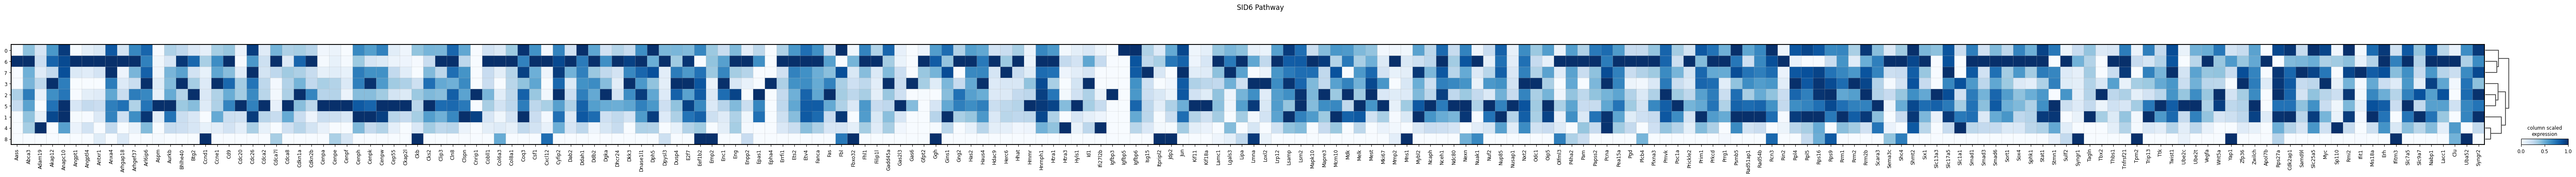

In [84]:
# Get list of genes that exist in adata
valid_genes = [gene for gene in mouse_SID6_genes if gene in adata.var_names]

# Print removed genes for reference
removed_genes = set(mouse_SID6_genes) - set(valid_genes)
print("Removed genes not found in dataset:", removed_genes)

# Create matrix plot of mouse SID6 genes
sc.pl.matrixplot(adata, valid_genes, "integrated_snn_res.0.4", dendrogram=True, cmap="Blues", standard_scale="var", colorbar_title="column scaled\nexpression", title = "SID6 Pathway")

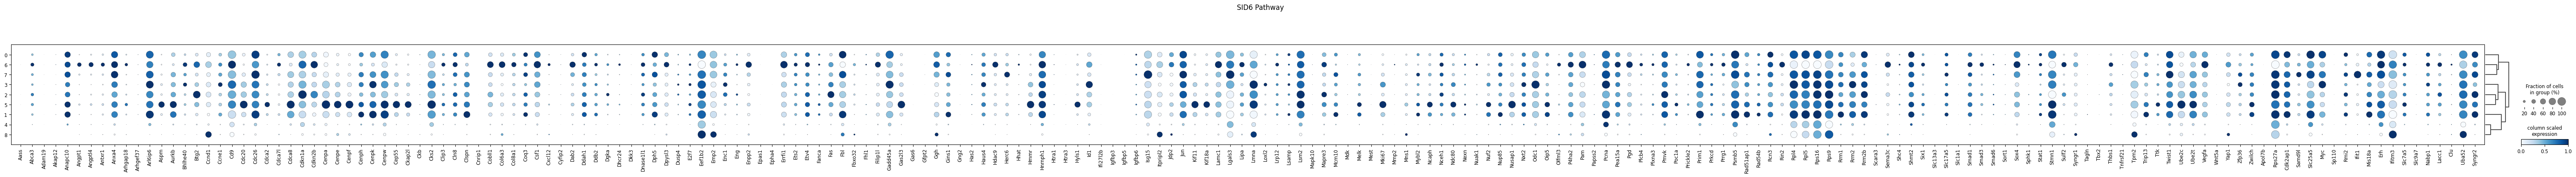

In [89]:
# dotplot of mouse SID6 genes
sc.pl.dotplot(adata, valid_genes, "integrated_snn_res.0.4", dendrogram=True, cmap="Blues", standard_scale="var", colorbar_title="column scaled\nexpression", title = "SID6 Pathway")


In [99]:
adata_subset = adata[:, valid_genes]
adata_subset

View of AnnData object with n_obs × n_vars = 17126 × 210
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.2', 'integrated_snn_res.0.25', 'integrated_snn_res.0.3', 'integrated_snn_res.0.35', 'integrated_snn_res.0.5', 'seurat_clusters', 'old.ident', 'integrated_snn_res.0.4', 'integrated_snn_res.0.45', 'integrated_snn_res.0.55', 'integrated_snn_res.0.6', 'Treatment', 'cluster.treatment', 'SID1_Score', 'SID2_Score', 'SID3_Score', 'SID4_Score', 'SID5_Score', 'SID6_Score', 'SID1_binary', 'SID2_binary', 'SID3_binary', 'SID4_binary', 'SID5_binary', 'SID6_binary'
    uns: 'integrated_snn_res.0.4_colors', 'neighbors', 'pca', 'umap', 'dendrogram_integrated_snn_res.0.4'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/tmp/ipykernel_64914/1831317900.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby(adata_subset.obs['integrated_snn_res.0.4']).mean()


Number of top genes selected: 37
Top genes: ['Cd9', 'Eef1b2', 'Rps16', 'Ifitm3', 'Cenpa', 'Cdca8', 'Cenpf', 'Rps9', 'Slc25a5', 'Isg15', 'Lsm2', 'Rpl5', 'Ggh', 'Lmna', 'Ube2c', 'Itpripl2', 'Cenpw', 'Fbl', 'Cdkn2b', 'Tpm2', 'Ccnd1', 'Emp2', 'Pcna', 'Uba52', 'Errfi1', 'Stmn1', 'Rpl4', 'Erh', 'Psmb5', 'Odc1', 'Cdkn1a', 'Cdc26', 'Rps27a', 'Cks2', 'Ifit1', 'Lgals3', 'Gadd45a']


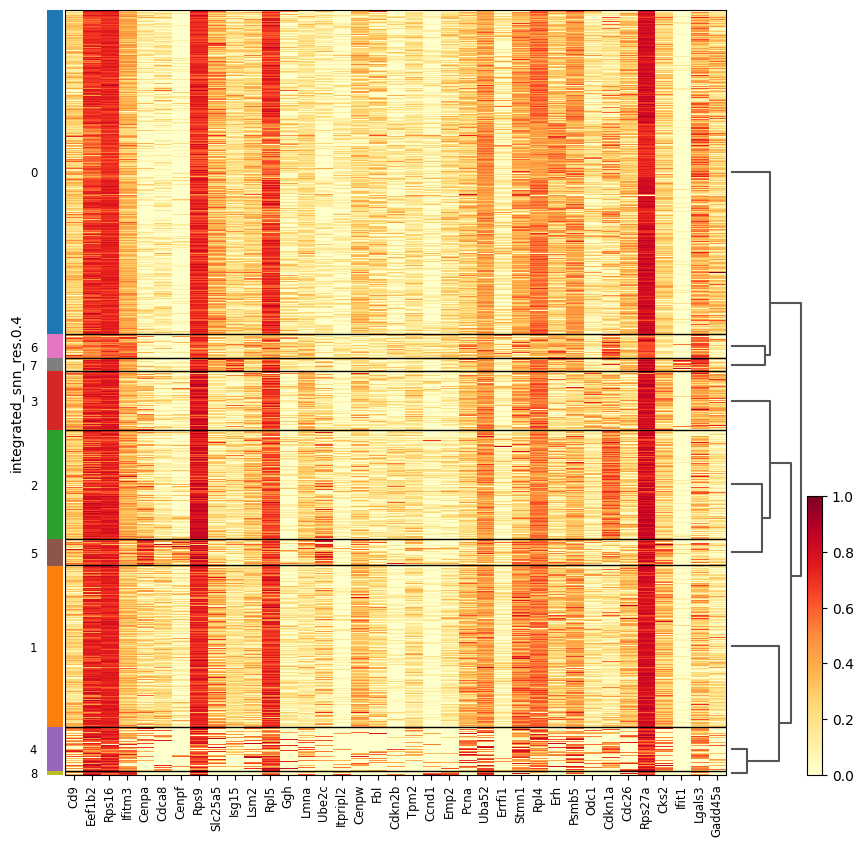

In [100]:
# Calculate mean expression per cluster
cluster_means = sc.get.obs_df(
    adata_subset,
    keys=valid_genes,
    use_raw=True if adata.raw is not None else False
).groupby(adata_subset.obs['integrated_snn_res.0.4']).mean()

# Convert to DataFrame for easier manipulation
mean_expr_df = pd.DataFrame(cluster_means)

# Get top 20 genes for each cluster
top_genes = set()  # Use set to avoid duplicates
for cluster in mean_expr_df.index:
    top_20_for_cluster = mean_expr_df.loc[cluster].nlargest(20).index.tolist()
    top_genes.update(top_20_for_cluster)

# Convert set to list
top_genes = list(top_genes)

print(f"Number of top genes selected: {len(top_genes)}")
print("Top genes:", top_genes)

# Plot heatmap with top genes
sc.pl.heatmap(adata, 
              var_names=top_genes, 
              groupby='integrated_snn_res.0.4', 
              figsize=(10,10),
              dendrogram=True,
              standard_scale='var',
              cmap='YlOrRd')

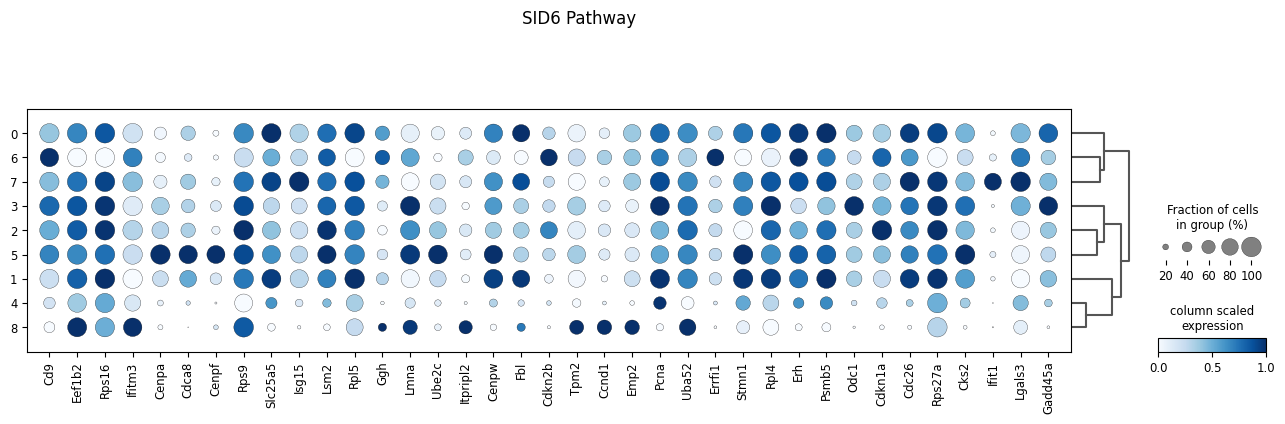

In [101]:
# dotplot of top genes
sc.pl.dotplot(adata, top_genes, "integrated_snn_res.0.4", dendrogram=True, cmap="Blues", standard_scale="var", colorbar_title="column scaled\nexpression", title = "SID6 Pathway")

## Heatmap of gene expression of custom gene list

In [ ]:
# custom geneset from NIA (human fibroblasts)
NIA_sen_genes = [
    "CKS2",
    "CCNB1",
    "PTTG1", 
    "QSOX1",
    "PARP1",
    "LBR",
    "LMNB1",
    "UQCR11",
    "NDUFA1", 
    "NDUFA3",
    "COX6B1",
    "CST3",
    "TGFB1",
    "PALLD",
    "CCND1",
    "IGFBP7",
    "SSRP1",
    "ANP32B",
    "PINK1",
    "BCL2L2"
]
# convert to mouse genes using gtf files of both species and ortholog information file
ortholog_info = pd.read_csv('/ix/djishnu/Akanksha/datasets/gene_sets/human_mouse_1to1_orthologs.csv')
ortholog_info


In [ ]:
# search for the human genes in the ortholog df and return the mouse orthologs
mouse_NIA_sen_genes = ortholog_info[ortholog_info['human'].isin(NIA_sen_genes)]['mouse'].tolist()
display(mouse_NIA_sen_genes)

# display the human genes not in the ortholog df
human_NIA_sen_genes_not_in_ortholog = set(NIA_sen_genes) - set(ortholog_info['human'])
display(human_NIA_sen_genes_not_in_ortholog)

# append curated genes to the mouse_NIA_sen_genes list
ortholog_genes_mouse = ['Anp32b','Palld', 'Pttg1']
mouse_NIA_sen_genes = mouse_NIA_sen_genes + ortholog_genes_mouse
display(mouse_NIA_sen_genes)



In [ ]:
# scanpy heatmap of the mouse NIA senescence genes for both treated and control adata
sc.pl.heatmap(adata_tamxoifen, var_names = mouse_NIA_sen_genes, groupby = 'integrated_snn_res.0.4', figsize = (10,10))
sc.pl.heatmap(adata_control, var_names = mouse_NIA_sen_genes, groupby = 'integrated_snn_res.0.4', figsize = (10,10))


In [ ]:
sc.pl.matrixplot(
    adata_tamxoifen,
    mouse_NIA_sen_genes,
    "integrated_snn_res.0.4",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    title = "Tamoxifen treated"
    #return_fig = True
)
#mp_tam.add_totals().style(edge_color='black').show()
sc.pl.matrixplot(
    adata_control,
    mouse_NIA_sen_genes,
    "integrated_snn_res.0.4",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    title = "Proliferating control"
    #return_fig = True
)
#mp_prol.add_totals().style(edge_color='black').show()


In [ ]:
# plot matrix plot for all cells
sc.pl.matrixplot(adata, mouse_NIA_sen_genes, "integrated_snn_res.0.4", dendrogram=True, cmap="Blues", standard_scale="var", colorbar_title="column scaled\nexpression", title = "Integrated Tamoxifen Treated and Proliferating Control")
#mp_all.add_totals().style(edge_color='black').show()